In [4]:
import numpy as np
import pandas as pd
import os, pickle, csv, glob, copy
import nibabel as nb
from nilearn import datasets, surface
import matplotlib.pyplot as plt
import matplotlib

In [8]:
#change both the time window and the max t stat accordingly

wdir = 'C:/Users/andre/Desktop/Salerno/projects/gpt/scripts/GPT2_word_saliency_fMRI/outputs'
excel_file = os.path.join(wdir,'saliency_results.xlsx')
#excel_file = os.path.join(wdir,'surprisal_results.xlsx')

In [9]:
table = pd.read_excel(excel_file, sheet_name = 'Intersection')
table

,ID,Area,15,30,45,60,75,90,Nr of time window,1 time window,2 time windows,3 time windows,4 time windows,5 time windows,6 time window
0,84.0,7Networks_LH_SomMot_3,NaN,NaN,NaN,5.945068,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,85.0,7Networks_LH_SomMot_4,NaN,NaN,NaN,5.339503,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,88.0,7Networks_LH_SomMot_7,NaN,NaN,NaN,4.757067,4.652178,4.492872,3.0,0.0,0.0,1.0,0.0,0.0,0.0
3,89.0,7Networks_LH_SomMot_8,NaN,NaN,NaN,4.843158,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,90.0,7Networks_LH_SomMot_9,NaN,NaN,NaN,4.206595,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,178.0,7Networks_LH_DorsAttn_Post_6,NaN,NaN,NaN,4.270533,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,337.0,7Networks_LH_Cont_PFCd_1,NaN,NaN,NaN,4.225183,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,404.0,7Networks_LH_Default_Temp_11,NaN,NaN,NaN,4.107618,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,408.0,7Networks_LH_Default_Temp_15,NaN,NaN,NaN,6.511611,5.210604,NaN,2.0,0.0,1.0,0.0,0.0,0.0,0.0
9,411.0,7Networks_LH_Default_Temp_18,NaN,NaN,NaN,5.132535,4.948062,4.866494,3.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
atlas = nb.load(os.path.join('C:/Users/andre/Desktop/Salerno/projects/gpt/scripts/GPT2_word_saliency_fMRI/data/schaefer_2018/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'))
network_names = pd.read_excel(os.path.join('C:/Users/andre/Desktop/Salerno/projects/gpt/scripts/GPT2_word_saliency_fMRI/data/schaefer_2018/Network_names.xlsx'))
atlas4plot = datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=7, resolution_mm=2)

custom_cmap = matplotlib.cm.get_cmap('tab10',8)

measure = 'saliency'#'surprisal'

Assign Network name to Nr of time window

In [10]:
tmp_vec = np.zeros((6,7))

#loop on the number of time windows
for i in range(6):
    
    atlas_mat = np.zeros_like(atlas_data)
 
    #loop over the table data
    for j in range(table.shape[0]):
        
        id_area = table.iloc[j]['ID']
        if table.iloc[j]['Nr of time window']==i+1: #if we are looking at the correct data
            network_id = network_names.loc[network_names['ID']==id_area]['ID Network'].values[0] #get the indices of the network
            tmp_vec[i,network_id-1]=tmp_vec[i,network_id-1]+1
    
print(tmp_vec)

[[0. 7. 1. 1. 0. 1. 2.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 2. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


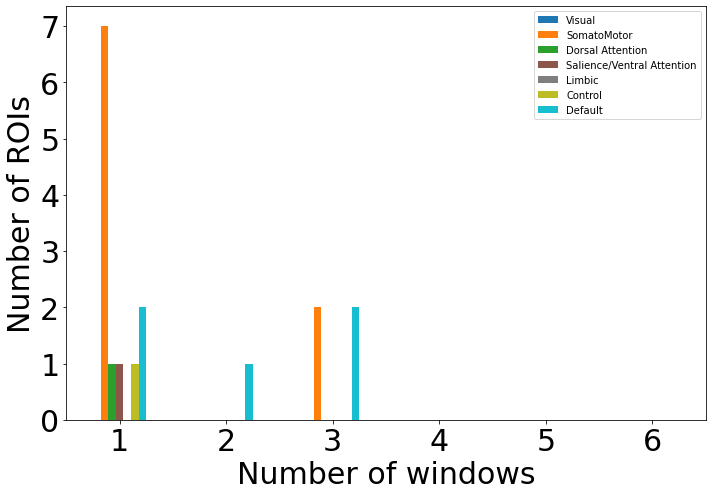

In [11]:
network_x_nr_of_win = pd.DataFrame(data=tmp_vec,columns=['Visual','SomatoMotor','Dorsal Attention', 'Salience/Ventral Attention',
                                          'Limbic', 'Control','Default'], index = np.arange(6)+1)

ax = network_x_nr_of_win.plot.bar(rot=0,figsize = (10,7), fontsize=30, colormap = custom_cmap)
ax.set_xlabel('Number of windows',size=30)
ax.set_ylabel('Number of ROIs',size=30)


plt.tight_layout()
#plt.savefig(os.path.join(wdir,'NrOfWindow_X_Network',measure,'NrOfWindow_X_Network.png'),facecolor='white', dpi=300,transparent=False)

Assign Network name to each time window

In [12]:
tmp_vec = np.zeros((6,7))

time_windows = np.arange(15,105,15)
print(time_windows)

#loop on the number of time windows
for idx,i in enumerate(time_windows):
    
    atlas_mat = np.zeros_like(atlas_data)
    

    #loop over the table data
    for j in range(table.shape[0]):
        
        id_area = table.iloc[j]['ID']
        if  not np.isnan(table.iloc[j][i]): #if we are looking at the correct data
            network_id = network_names.loc[network_names['ID']==id_area]['ID Network'].values[0] #get the indices of the network
        
            tmp_vec[idx,network_id-1]=tmp_vec[idx,network_id-1]+1

    
    
print(tmp_vec)

[15 30 45 60 75 90]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 8. 1. 0. 0. 1. 4.]
 [0. 2. 0. 0. 0. 0. 3.]
 [0. 3. 0. 1. 0. 0. 3.]]


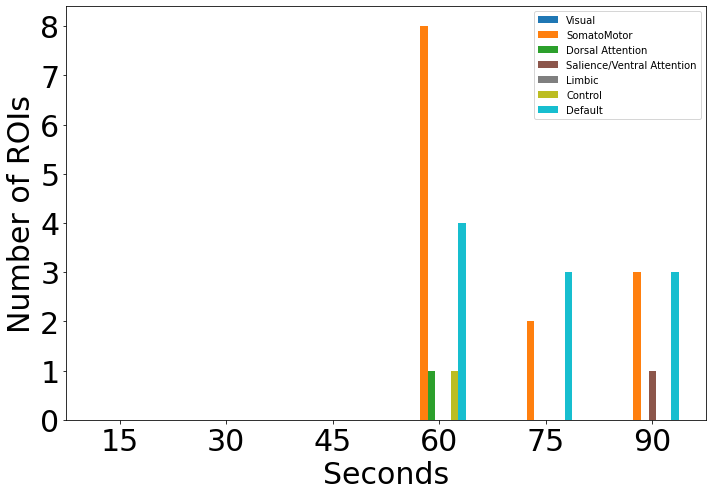

In [14]:
network_x_nr_of_win = pd.DataFrame(data=tmp_vec,columns=['Visual','SomatoMotor','Dorsal Attention', 'Salience/Ventral Attention',
                                          'Limbic', 'Control','Default'],index=time_windows)    

ax = network_x_nr_of_win.plot.bar(rot=0, figsize = (10,7), fontsize=30, colormap = custom_cmap)
ax.set_xlabel('Seconds', size=30)
ax.set_ylabel('Number of ROIs',size=30)
plt.tight_layout()